# Claim

*I have completed the task on my own and would like to clarify that the question at the beginning was part of the provided instructions for this assignment. The rest of the content, including the analysis, code implementation, and markdown answer, has been done independently by me.*

# Statistical Analysis with Pandas and Seaborn

This Jupyter Notebook showcases the use of **Pandas** and **Seaborn** libraries for performing statistical analysis on the dataset. The analysis includes answering various questions and exploring relationships between variables using descriptive statistics, data visualization, and calculations.

## Dataset

The analysis is performed on the NHANES 2015-2016 dataset, which contains demographic, health, and nutrition information of individuals. The dataset is loaded using Pandas, and various statistical operations are applied to gain insights.

## Overview

This notebook is part of the **Statistics with Python Specialization** offered by the **University of Michigan**. It is extracted from **Week 2 Course 1: Understanding and Visualizing Data with Python**.

Throughout the notebook, we will explore different statistical questions and utilize the power of Pandas and Seaborn to analyze and visualize the data. The goal is to gain a deeper understanding of the dataset and draw meaningful insights from it.

# Practice notebook for univariate analysis using NHANES data

This notebook will give you the opportunity to perform some univariate analyses on your own using the NHANES.  These analyses are similar to what was done in the week 2 NHANES case study notebook.

You can enter your code into the cells that say "enter your code here", and you can type responses to the questions into the cells that say "Type Markdown and Latex".

Note that most of the code that you will need to write below is very similar to code that appears in the case study notebook.  You will need to edit code from that notebook in small ways to adapt it to the prompts below.

To get started, we will use the same module imports and read the data in the same way as we did in the case study:

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
import numpy as np
sns.set_theme(rc={'figure.dpi':120,'figure.figsize':(6,4)})
da = pd.read_csv("nhanes_2015_2016.csv")

## Question 1

Relabel the marital status variable [DMDMARTL](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#DMDMARTL) to have brief but informative character labels.  Then construct a frequency table of these values for all people, then for women only, and for men only.  Then construct these three frequency tables using only people whose age is between 30 and 40.

In [2]:
da['RIAGENDRx'] = da['RIAGENDR'].replace({1:'Male', 2:'Female'}).dropna()

In [3]:
# Replace marital status values
da['DMDMARTLx'] = da['DMDMARTL'].replace({
    1: "Married", 2: "Widowed", 3: "Divorced", 4: "Separated",
    5: "Never married", 6: "Living with partner",
    77: "Refused", 99: "Don't Know"
})

# Frequency table for all people
all_freq_table = da['DMDMARTLx'].value_counts()

# Filter data for women only
women_data = da[da['RIAGENDRx'] == 'Female']
women_freq_table = women_data['DMDMARTLx'].value_counts()

# Filter data for men only
men_data = da[da['RIAGENDRx'] == 'Male']
men_freq_table = men_data['DMDMARTLx'].value_counts()

# Frequency table for people whose age is between 30 and 40
age_filtered_data = da[(da['RIDAGEYR'] >= 30) & (da['RIDAGEYR'] <= 40)]
age_filtered_freq_table = age_filtered_data['DMDMARTLx'].value_counts()

# Print the frequency tables
print("Frequency table for all people:")
print(all_freq_table)
print("\nFrequency table for women only:")
print(women_freq_table)
print("\nFrequency table for men only:")
print(men_freq_table)
print("\nFrequency table for people whose age is between 30 and 40:")
print(age_filtered_freq_table)


Frequency table for all people:
Married                2780
Never married          1004
Divorced                579
Living with partner     527
Widowed                 396
Separated               186
Refused                   2
Name: DMDMARTLx, dtype: int64

Frequency table for women only:
Married                1303
Never married           520
Divorced                350
Widowed                 296
Living with partner     262
Separated               118
Refused                   1
Name: DMDMARTLx, dtype: int64

Frequency table for men only:
Married                1477
Never married           484
Living with partner     265
Divorced                229
Widowed                 100
Separated                68
Refused                   1
Name: DMDMARTLx, dtype: int64

Frequency table for people whose age is between 30 and 40:
Married                560
Never married          217
Living with partner    143
Divorced                70
Separated               30
Widowed                  5
Refu

__Q1a.__ Briefly comment on some of the differences that you observe between the distribution of marital status between women and men, for people of all ages.

> The distribution of marital status between women and men in the overall population shows that there are more married women (1303) than married men (1477). Additionally, the proportion of never married women (520) is higher than never married men (484).

__Q1b.__ Briefly comment on the differences that you observe between the distribution of marital status states for women between the overall population, and for women between the ages of 30 and 40.

> When comparing the distribution of marital status for women between the overall population and the age group of 30 to 40, we observe a decrease in the proportion of married women (1303 vs. 560), never married women (520 vs. 217), and women living with a partner (262 vs. 143) in the age group of 30 to 40.

__Q1c.__ Repeat part b for the men.

> Similarly, for men between the overall population and the age group of 30 to 40, there is a decrease in the proportion of married men (1477 vs. 560), never married men (484 vs. 217), and men living with a partner (265 vs. 143) in the age group of 30 to 40. The proportions of divorced, widowed, and separated men remain relatively similar between the two groups.

## Question 2

Restricting to the female population, stratify the subjects into age bands no wider than ten years, and construct the distribution of marital status within each age band.  Within each age band, present the distribution in terms of proportions that must sum to 1.

In [4]:
da["agegroup"] = pd.cut(da["RIDAGEYR"], [10, 20, 30, 40, 50, 60, 70, 80])
women_data = da[da['RIAGENDRx'] == 'Female']
women_data = women_data[women_data['DMDMARTLx'] != 'Refused']
x = women_data.groupby('agegroup')['DMDMARTLx'].value_counts().unstack()
proportions = x.div(x.sum(axis=1), axis=0).round(3)
proportions

DMDMARTLx,Divorced,Living with partner,Married,Never married,Separated,Widowed
agegroup,,,,,,
"(10, 20]",NaN,0.205,0.026,0.769,NaN,NaN
"(20, 30]",0.021,0.206,0.305,0.446,0.021,NaN
"(30, 40]",0.091,0.120,0.544,0.205,0.036,0.004
"(40, 50]",0.137,0.074,0.574,0.125,0.066,0.024
"(50, 60]",0.177,0.068,0.548,0.090,0.058,0.060
"(60, 70]",0.193,0.043,0.481,0.086,0.050,0.147
"(70, 80]",0.144,0.007,0.317,0.051,0.020,0.461


In [5]:
da["agegroup"] = pd.cut(da["RIDAGEYR"], [10, 20, 30, 40, 50, 60, 70, 80])
women_data = da[da['RIAGENDRx'] == 'Female']
women_data = women_data[women_data['DMDMARTLx'] != 'Refused']
x = women_data.groupby('agegroup')['DMDMARTLx'].value_counts().unstack()
x

DMDMARTLx,Divorced,Living with partner,Married,Never married,Separated,Widowed
agegroup,,,,,,
"(10, 20]",NaN,8.0,1.0,30.0,NaN,NaN
"(20, 30]",11.0,106.0,157.0,229.0,11.0,NaN
"(30, 40]",43.0,57.0,258.0,97.0,17.0,2.0
"(40, 50]",69.0,37.0,288.0,63.0,33.0,12.0
"(50, 60]",83.0,32.0,257.0,42.0,27.0,28.0
"(60, 70]",85.0,19.0,212.0,38.0,22.0,65.0
"(70, 80]",59.0,3.0,130.0,21.0,8.0,189.0


__Q2a.__ Comment on the trends that you see in this series of marginal distributions.

<blockquote>Looking at the series of marginal distributions provided, we can observe the following trends:

1. Within the age group of (10, 20], the majority of individuals (76.9%) have never been married, while a smaller proportion (20.5%) is living with a partner. The remaining categories, such as Divorced, Living with partner, Separated, and Widowed, have NaN values, indicating that they do not occur within this age group.

2. In the age group of (20, 30], the distribution shows a more balanced pattern. The largest proportion (44.6%) falls under the category of "Never married," followed by "Married" (30.5%) and "Living with partner" (20.6%). Additionally, there are smaller proportions for "Divorced" (2.1%), "Separated" (2.1%), and NaN values for "Widowed."

3. As we move into higher age groups, the proportion of individuals who are "Married" tends to increase. For instance, in the age group of (30, 40], more than half (54.4%) of individuals are married, while smaller proportions fall under other categories such as "Never married" (20.5%), "Living with partner" (12.0%), "Divorced" (9.1%), "Separated" (3.6%), and "Widowed" (0.4%).

4. This trend continues in subsequent age groups, with the proportion of "Married" individuals generally increasing and becoming the dominant category. However, there are still noticeable proportions of individuals in other categories, such as "Never married," "Divorced," "Living with partner," "Separated," and "Widowed."

5. It is interesting to note that in the age group of (70, 80], the proportion of individuals who are "Widowed" is quite high (46.1%), indicating a higher likelihood of being widowed in this older age group. This is expected as people tend to experience the loss of a spouse as they grow older.

Overall, these marginal distributions provide insights into the changing proportions of marital status categories across different age groups, highlighting the increasing prevalence of marriage as individuals grow older and the higher likelihood of being widowed in the elderly population.</blockquote>

__Q2b.__ Repeat the construction for males.

In [6]:
da["agegroup"] = pd.cut(da["RIDAGEYR"], [10, 20, 30, 40, 50, 60, 70, 80])
men_data = da[da['RIAGENDRx'] == 'Male']
men_data = men_data[men_data['DMDMARTLx'] != 'Refused']
x = men_data.groupby('agegroup')['DMDMARTLx'].value_counts().unstack()
proportions = x.div(x.sum(axis=1), axis=0).round(3)
proportions

DMDMARTLx,Divorced,Living with partner,Married,Never married,Separated,Widowed
agegroup,,,,,,
"(10, 20]",NaN,0.075,0.025,0.900,NaN,NaN
"(20, 30]",0.005,0.213,0.238,0.523,0.016,0.005
"(30, 40]",0.053,0.158,0.565,0.195,0.026,0.004
"(40, 50]",0.085,0.082,0.703,0.097,0.027,0.005
"(50, 60]",0.126,0.075,0.652,0.104,0.022,0.022
"(60, 70]",0.126,0.050,0.666,0.087,0.032,0.039
"(70, 80]",0.142,0.022,0.612,0.022,0.035,0.167


__Q2c.__ Comment on any notable differences that you see when comparing these results for females and for males.

<blockquote>When comparing the results for females and males in terms of marital status distribution across age groups, we can observe some notable differences:

1. In the age group of (10, 20], both females and males show a high proportion of individuals who have never been married, with 90% for males and 76.9% for females. However, the proportion of males living with a partner is higher (7.5%) compared to females (2.5%).

2. In the age group of (20, 30], both females and males have a higher proportion of individuals who have never been married. However, males show a slightly higher proportion of individuals who are married (23.8%) compared to females (30.5%). Additionally, the proportion of males who are divorced (0.5%) is higher than that of females (0.2%).

3. In the age group of (30, 40], both females and males have a similar pattern, with the highest proportion being married. However, males have a higher proportion of individuals who are divorced (5.3%) compared to females (9.1%). Females, on the other hand, have a higher proportion of individuals who have never been married (19.5%) compared to males (15.8%).

4. As we move into higher age groups, both females and males show a similar trend of an increasing proportion of individuals who are married. However, there are some differences in the distribution of other categories. For example, in the age group of (70, 80], females have a higher proportion of individuals who are widowed (46.1%) compared to males (16.7%).

5. Overall, both females and males generally follow a similar trend of increasing proportions of individuals who are married as they grow older. However, there are some notable differences, such as the higher proportion of males living with a partner in the younger age group and the higher proportion of females who are widowed in the older age group.

These differences suggest variations in marital status distribution between females and males, reflecting potential gender-specific factors and societal norms influencing marital choices and experiences.</blockquote>

## Question 3

Construct a histogram of the distribution of heights using the BMXHT variable in the NHANES sample.

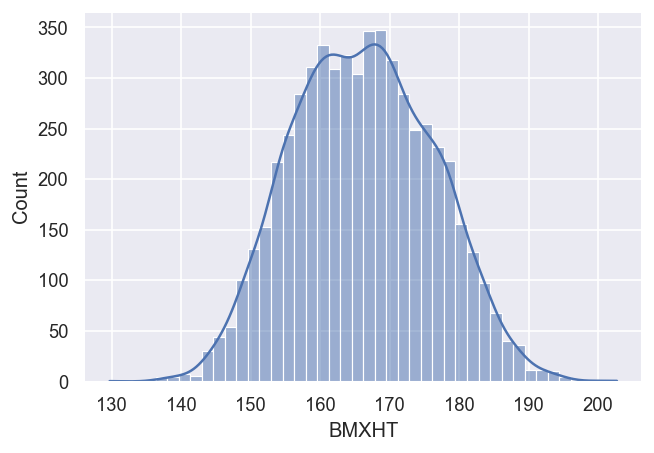

In [7]:
sns.histplot(da['BMXHT'], kde=True);

__Q3a.__ Use the `bins` argument to [distplot](https://seaborn.pydata.org/generated/seaborn.distplot.html) to produce histograms with different numbers of bins.  Assess whether the default value for this argument gives a meaningful result, and comment on what happens as the number of bins grows excessively large or excessively small. 

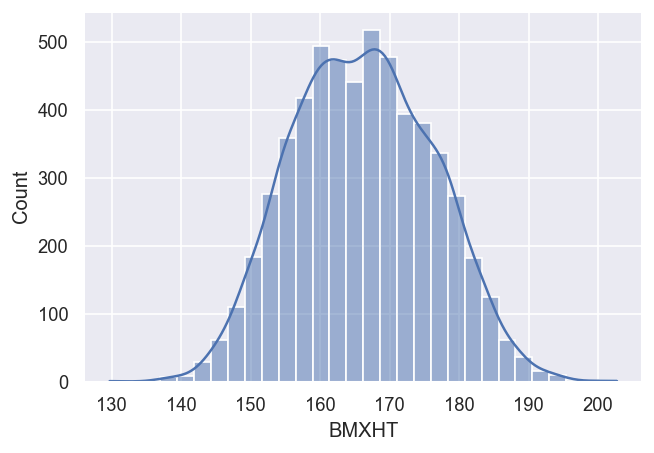

In [8]:
sns.histplot(da['BMXHT'], kde=True, bins = 30);

> The default value generally provides a reasonable representation of the underlying distribution. However, the default value may not always capture subtle details or variations in the data.
> 
> - **Excessively large number of bins:** If the number of bins is set excessively large, each bin will represent a very narrow range of values. This can result in a fragmented and noisy histogram, where individual data points may appear as separate bars. The excessive binning can lead to overfitting and make it difficult to interpret the overall shape and pattern of the distribution. It can also introduce spurious fluctuations that do not reflect the underlying data distribution.
> 
> - **Excessively small number of bins:** If the number of bins is set excessively small, the histogram will have very few bins, resulting in a loss of detail and potentially obscuring important features of the distribution. The histogram may become too coarse to accurately represent the data, leading to a loss of information and making it difficult to identify patterns or identify specific regions of interest in the distribution.

__Q3b.__ Make separate histograms for the heights of women and men, then make a side-by-side boxplot showing the heights of women and men.

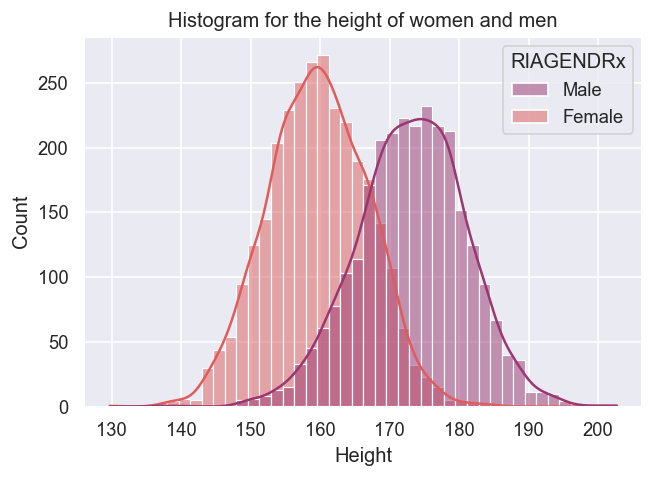

In [9]:
sns.histplot(data = da, x = 'BMXHT', hue = 'RIAGENDRx', palette = 'flare_r', kde=True)
plt.title('Histogram for the height of women and men')
plt.xlabel('Height');

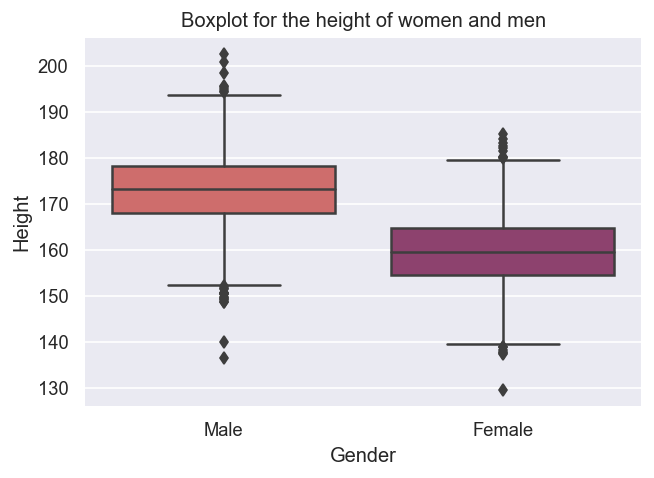

In [10]:
sns.boxplot(data = da, y = 'BMXHT', x = 'RIAGENDRx', palette = 'flare')
plt.title('Boxplot for the height of women and men')
plt.xlabel('Gender')
plt.ylabel('Height');

__Q3c.__ Comment on what features, if any are not represented clearly in the boxplots, and what features, if any, are easier to see in the boxplots than in the histograms.

##### Histogram:
> The histograms clearly show that the distribution of heights is different between males and females. The histogram for males is centered around 175cm, while the histogram for females is centered around 160cm. This suggests that, on average, males tend to be taller than females in the NHANES survey data.
> Additionally, both histograms display a bell-shaped curve, indicating a relatively normal distribution of heights within each gender. This means that there is a higher frequency or prevalence of individuals with heights close to the mean value. However, it's important to note that the histograms alone do not provide information about the statistical significance or the magnitude of the difference between males and females.
> Furthermore, based on the histograms, it appears that there is a higher frequency of female participants in the NHANES survey, as the histogram for females has a larger area under the curve compared to the histogram for males. This observation suggests that more females have been included in the survey dataset.
##### Boxplot:
> The boxplots provide a clear visualization of the median height for males and females. The median height for males is approximately 174cm, while the median height for females is around 160cm. This suggests that, on average, males tend to be taller than females in the NHANES survey data.
> 
> In addition, the boxplots reveal the presence of outliers, which are data points that lie significantly outside the range of the majority of the data. For males, there are outliers at around 200cm (possibly indicating extremely tall individuals) and around 140cm (possibly indicating individuals with significantly shorter stature). Similarly, for females, outliers are observed at approximately 130cm (possibly indicating individuals with significantly shorter stature) and around 185cm (possibly indicating extremely tall individuals).
> 
> Furthermore, the range (the difference between the maximum and minimum values) and the interquartile range (IQR) of both genders appear to be relatively similar. This suggests that the spread of heights within each gender is comparable, with similar variability observed.

## Question 4

Make a boxplot showing the distribution of within-subject differences between the first and second systolic blood pressure measurents ([BPXSY1](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BPX_I.htm#BPXSY1) and [BPXSY2](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BPX_I.htm#BPXSY2)).

Text(0.5, 1.0, 'Distribution of Within-Subject Differences in Systolic Blood Pressure')

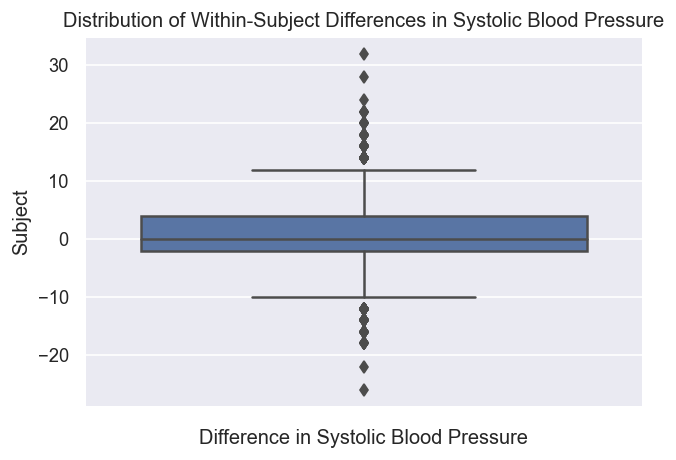

In [11]:
da['BPXSY_diff'] = da['BPXSY1'] - da['BPXSY2']

sns.boxplot(data=da, y='BPXSY_diff')

# Set labels and title
plt.xlabel('Difference in Systolic Blood Pressure')
plt.ylabel('Subject')
plt.title('Distribution of Within-Subject Differences in Systolic Blood Pressure')

__Q4a.__ What proportion of the subjects have a lower SBP on the second reading compared to the first?

In [12]:
lower_sbp_count = sum(da['BPXSY_diff'] > 0)
total_subjects = len(da)

proportion_lower_sbp = round(lower_sbp_count / total_subjects,3)
print(f"The proportion of the subjects have a lower SBP on the second: {proportion_lower_sbp}%")

The proportion of the subjects have a lower SBP on the second: 0.429%


__Q4b.__ Make side-by-side boxplots of the two systolic blood pressure variables.

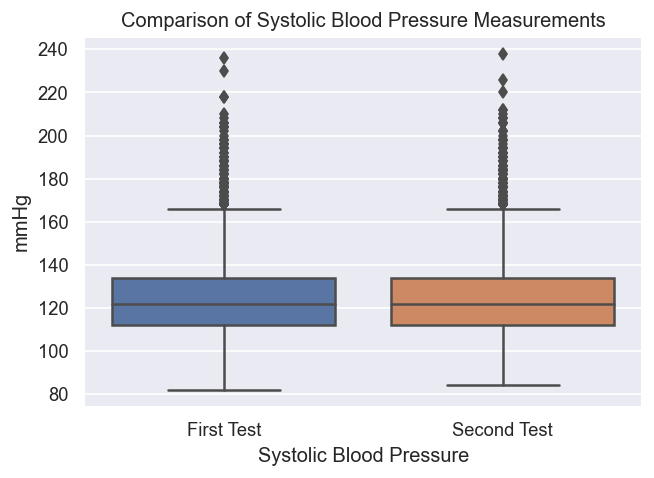

In [13]:
sns.boxplot(data=da[['BPXSY1', 'BPXSY2']])
plt.xlabel('Systolic Blood Pressure')
plt.ylabel('mmHg')
plt.title('Comparison of Systolic Blood Pressure Measurements')
plt.xticks(ticks=[0, 1], labels=['First Test', 'Second Test']);

__Q4c.__ Comment on the variation within either the first or second systolic blood pressure measurements, and the variation in the within-subject differences between the first and second systolic blood pressure measurements.

> **The variation within the first and second systolic blood pressure measurements is quite similar:**
>
>- The median of both measurements is around 120 mmHg, indicating that the central tendency of the distributions is similar.
>- The minimum value for both measurements is 82 mmHg, while the maximum value is 236 mmHg, suggesting a wide range of blood pressure values.
>- The interquartile range (IQR), which represents the range between the 25th and 75th percentiles, is from 112 mmHg to 134 mmHg for both measurements. This suggests that the middle 50% of the data falls within this range.
>- There are outliers present above the upper whisker to almost 240mmHg in both boxplots, indicating the presence of extreme values beyond the upper quartile.
>
>**In contrast, the variation in the within-subject differences between the first and second systolic blood pressure measurements shows some distinct characteristics:**
>
>- The median difference is 0 mmHg, indicating that, on average, there is no change in systolic blood pressure between the first and second readings.
>- The IQR is from -2 to 4 mmHg, suggesting that most of the subjects had a within-subject difference of -2 to 4 mmHg. This range represents the middle 50% of the data.
>- The range of the within-subject differences is from -26 to 32 mmHg, indicating that there are some individuals with substantial changes in blood pressure between the two readings.
>- There are outliers present around -20 to -10 mmHg and from 20 to 30 mmHg, indicating extreme differences between the first and second measurements for certain individuals.
>
>Overall, while the variation within the first and second systolic blood pressure measurements is similar in terms of the median, range, and IQR, the within-subject differences exhibit more variability, with some individuals showing significant changes in systolic blood pressure between the two readings.

## Question 5

Construct a frequency table of household sizes for people within each educational attainment category (the relevant variable is [DMDEDUC2](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#DMDEDUC2)).  Convert the frequencies to proportions.

In [14]:
da["DMDEDUC2x"] = da.DMDEDUC2.replace({1: "<9", 2: "9-11", 3: "HS/GED", 4: "Some college/AA", 5: "College", 
                                       7: "Refused", 9: "Don't know"})
edu = da[da["DMDEDUC2x"] != "Don't know"] #exclude minor values of Don't Know" group

In [15]:
# DMDHHSIZ - Total number of people in the Household

# The first way to achieve the result
frequency_table = edu.groupby(["DMDEDUC2x", "DMDHHSIZ"]).size()
proportions = frequency_table.groupby(level=0, group_keys=False).apply(lambda x: x / x.sum())
proportions.round(3).unstack()

DMDHHSIZ,1,2,3,4,5,6,7
DMDEDUC2x,,,,,,,
9-11,0.117,0.222,0.163,0.152,0.146,0.114,0.086
<9,0.110,0.224,0.147,0.133,0.148,0.108,0.130
College,0.143,0.348,0.194,0.165,0.095,0.029,0.026
HS/GED,0.153,0.271,0.171,0.162,0.110,0.066,0.068
Some college/AA,0.151,0.269,0.193,0.169,0.122,0.051,0.045


In [16]:
# Second way to achieve the same result
frequency_table = edu.groupby(["DMDEDUC2x", "DMDHHSIZ"]).size().unstack()
frequency_table.div(frequency_table.sum(axis = 1), axis = 0).round(3)

DMDHHSIZ,1,2,3,4,5,6,7
DMDEDUC2x,,,,,,,
9-11,0.117,0.222,0.163,0.152,0.146,0.114,0.086
<9,0.110,0.224,0.147,0.133,0.148,0.108,0.130
College,0.143,0.348,0.194,0.165,0.095,0.029,0.026
HS/GED,0.153,0.271,0.171,0.162,0.110,0.066,0.068
Some college/AA,0.151,0.269,0.193,0.169,0.122,0.051,0.045


__Q5a.__ Comment on any major differences among the distributions.

<blockquote>In the frequency table showing household sizes for each educational attainment category, we can observe some notable differences among the distributions:

**Household Size**: For all educational attainment categories, the most common household sizes are 2 and 3, followed by 1 and 4. Larger household sizes (5, 6, and 7) have lower proportions across all categories.
 
**Educational Attainment Differences:**
- 9-11 and < 9 categories: The proportions across household sizes are relatively similar for both categories, with slightly higher proportions in household sizes 2 and 3 for the < 9 category compared to the 9-11 category.
- College category: The proportions in household sizes 1 and 2 are relatively lower compared to other categories. Household sizes 3 and 4 have higher proportions, indicating a slightly larger number of individuals in households of these sizes.
- HS/GED category: The proportions in household sizes 1 and 2 are relatively higher compared to other categories. Household sizes 3 and 4 also have notable proportions, indicating a relatively larger number of individuals in households of these sizes.
- Some college/AA category: The proportions across household sizes are relatively similar, with slightly higher proportions in household sizes 1 and 2 compared to other categories.

Overall, while there are some differences in the distributions, particularly in the proportions of household sizes 1, 2, 3, and 4, the patterns are relatively consistent across the educational attainment categories.</blockquote>

__Q5b.__ Restrict the sample to people between 30 and 40 years of age.  Then calculate the median household size for women and men within each level of educational attainment.

In [17]:
# People from 30 to 40
age_3040 = edu[(edu['RIDAGEYR'] >= 30) & (edu['RIDAGEYR'] <= 40)]

# Split by gender
female_3040 = age_3040[age_3040['RIAGENDR'] == 1]
male_3040 = age_3040[age_3040['RIAGENDR'] == 2]

# Calculate median household size for women from 30 to 40
female_median = female_3040.groupby('DMDEDUC2x')['DMDHHSIZ'].agg(np.median)
print("Median household size for women from 30 to 40:")
print(female_median)
print()
# Calculate median household size for men from 30 to 40
male_median = male_3040.groupby('DMDEDUC2x')['DMDHHSIZ'].agg(np.median)
print("Median household size for men from 30 to 40:")
print(male_median)

Median household size for women from 30 to 40:
DMDEDUC2x
9-11               4.5
<9                 5.0
College            3.0
HS/GED             4.0
Some college/AA    4.0
Name: DMDHHSIZ, dtype: float64

Median household size for men from 30 to 40:
DMDEDUC2x
9-11               5.0
<9                 5.0
College            3.0
HS/GED             5.0
Some college/AA    4.0
Name: DMDHHSIZ, dtype: float64


## Question 6

The participants can be clustered into "maked variance units" (MVU) based on every combination of the variables [SDMVSTRA](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#SDMVSTRA) and [SDMVPSU](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#SDMVPSU).  Calculate the mean age ([RIDAGEYR](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#RIDAGEYR)), height ([BMXHT](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BMX_I.htm#BMXHT)), and BMI ([BMXBMI](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BMX_I.htm#BMXBMI)) for each gender ([RIAGENDR](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#RIAGENDR)), within each MVU, and report the ratio between the largest and smallest mean (e.g. for height) across the MVUs.

In [18]:
# Group the data by MVU and RIAGENDR, calculate the mean of age, height, and BMI
grouped_data = da.groupby(['SDMVSTRA','SDMVPSU', 'RIAGENDRx'])[['RIDAGEYR', 'BMXHT', 'BMXBMI']].mean().unstack()

# Rename the columns in grouped_data
grouped_data = grouped_data.rename(columns={'RIDAGEYR': 'Mean Age', 'BMXHT': 'Mean Height', 'BMXBMI': 'Mean BMI'})

grouped_data

Mean Age            Mean Height               Mean BMI  \
RIAGENDRx            Female       Male      Female        Male     Female   
SDMVSTRA SDMVPSU                                                            
119      1        47.663265  47.861111  159.570408  172.741667  30.052041   
         2        52.987952  54.363636  159.244578  172.906818  27.849398   
120      1        43.636364  43.130000  155.402041  169.537755  32.419388   
         2        43.736111  45.219178  159.218056  173.075342  27.400000   
121      1        44.397959  46.750000  158.871579  172.177885  30.856842   
         2        44.376344  42.063158  160.229032  174.764516  26.470968   
122      1        42.897436  44.653061  161.315385  173.998969  29.447436   
         2        47.333333  44.320000  157.231111  170.332323  26.611111   
123      1        44.841121  47.829787  162.059615  174.315217  29.905769   
         2        46.457447  52.126582  160.476596  174.454430  30.641489   
124      1        51.664000  50.750000  158.788710  172.109009  29.533065   
         2        42.541667  48.245614  162.853521  174.291228  28.640845   
125      1        50.900901  55.165289  160.762385  173.631092  30.385321   
         2        51.660000  49.705882  160.021429  174.456863  28.564286   
126      1        46.229167  48.416667  160.387500  175.149398  31.262500   
         2        47.205882  48.666667  160.892000  174.713043  29.612121   
127      1        49.694444  53.137931  157.422430  171.545349  32.189720   
         2        51.486239  54.070588  159.022936  173.366667  30.770642   
128      1        55.638462  53.673267  156.339063  169.325000  32.303125   
         2        45.589744  45.822785  160.437179  172.400000  27.491026   
129      1        45.329787  43.922222  156.900000  171.094318  29.019149   
         2        43.500000  45.775510  161.034259  173.138298  29.429630   
130      1        47.810526  50.516854  161.977895  176.974157  30.700000   
         2        50.833333  50.535354  160.060577  175.061224  31.490385   
131      1        54.893617  53.140187  161.989362  175.610476  30.061702   
         2        45.000000  46.778846  161.673810  175.091346  32.984127   
132      1        43.210526  42.380435  161.508421  172.534066  29.848421   
         2        51.700000  49.038760  159.138281  172.809524  30.540625   
133      1        45.105882  44.054795  158.295122  171.509722  27.959259   
         2        47.063158  47.489796  158.627368  171.179167  29.000000   

                             
RIAGENDRx              Male  
SDMVSTRA SDMVPSU             
119      1        26.958333  
         2        27.160465  
120      1        30.939175  
         2        27.727397  
121      1        29.416505  
         2        26.273118  
122      1        28.528866  
         2        25.744444  
123      1        29.231522  
         2        28.811392  
124      1        28.614414  
         2        27.714035  
125      1        29.727731  
         2        29.143564  
126      1        29.033333  
         2        29.039130  
127      1        31.062353  
         2        30.557831  
128      1        31.749000  
         2        26.835443  
129      1        26.493182  
         2        28.961702  
130      1        30.337079  
         2        29.237755  
131      1        28.259615  
         2        30.077885  
132      1        28.546154  
         2        28.966667  
133      1        27.495833  
         2        27.966667

In [19]:
# ratio between the largest and smallest mean for age, bmi and height
ratio = grouped_data.max() / grouped_data.min()
ratio.unstack() #.transpose()

RIAGENDRx,Female,Male
Mean Age,1.307858,1.311487
Mean BMI,1.246049,1.233237
Mean Height,1.047950,1.045174


__Q6a.__ Comment on the extent to which mean age, height, and BMI vary among the MVUs.

>The mean age, height, and BMI vary among the MVUs. Here are some observations:
>
>1. Mean Age: There is some variation in the mean age across different MVUs. For example, in MVU 119, the mean age for females ranges from 47.66 to 52.99, while for males it ranges from 47.86 to 54.36. Similarly, in MVU 128, the mean age for females ranges from 55.64 to 45.59, while for males it ranges from 53.67 to 45.82. This indicates that the age distribution varies among different MVUs.
>
>2. Mean Height: The mean height also shows variation among the MVUs. In some MVUs, there is a noticeable difference in mean height between females and males. For example, in MVU 120, the mean height for females is around 155.40 to 159.22, while for males it is around 169.54 to 173.07. In contrast, in MVU 132, the mean height for both females and males is relatively similar, ranging from 161.51 to 172.53. This suggests that the height distribution differs across MVUs.
>
>3. Mean BMI: The mean BMI exhibits variation across different MVUs. In some cases, there is a notable difference in mean BMI between females and males. For instance, in MVU 119, the mean BMI for females ranges from 30.05 to 27.85, while for males it ranges from 26.96 to 27.16. On the other hand, in MVU 131, the mean BMI for females ranges from 30.06 to 32.98, while for males it ranges from 28.26 to 30.07. This indicates that the BMI distribution varies among different MVUs.
>
>Overall, these findings suggest that the mean age, height, and BMI vary to some extent among the MVUs, indicating potential differences in these characteristics across different population groups.

__Q6b.__ Calculate the inter-quartile range (IQR) for age, height, and BMI for each gender and each MVU.  Report the ratio between the largest and smalles IQR across the MVUs.

In [20]:
# Group the data by MVU and gender
grouped_data2 = da.groupby(['SDMVSTRA', 'SDMVPSU', 'RIAGENDRx'])

# Calculate the IQR for age, height, and BMI for each group
iqr_data = grouped_data2[['RIDAGEYR', 'BMXHT', 'BMXBMI']].agg(lambda x: np.percentile(x, 75) - np.percentile(x, 25)).unstack(level = -1)
iqr_data

RIDAGEYR          BMXHT          BMXBMI      
RIAGENDRx          Female   Male  Female    Male  Female  Male
SDMVSTRA SDMVPSU                                              
119      1          31.25  29.75   9.325   9.000   9.750  5.35
         2          33.50  29.00   9.950  11.225   9.350   NaN
120      1          26.50  23.75     NaN     NaN     NaN   NaN
         2          25.75  26.00  10.550  10.500   7.750  7.10
121      1          26.25  34.50     NaN  10.725     NaN   NaN
         2          26.00  25.50   9.600     NaN   8.100   NaN
122      1          24.00  29.50  10.400     NaN   9.875   NaN
         2          25.00  30.00   7.575     NaN   8.475   NaN
123      1          30.50  28.25     NaN     NaN     NaN   NaN
         2          34.50  31.50  11.200   9.900   9.975  8.10
124      1          27.00  32.00     NaN     NaN     NaN   NaN
         2          23.50  31.00     NaN  11.600     NaN  8.70
125      1          31.00  29.00     NaN     NaN     NaN   NaN
         2          32.25  33.50     NaN   7.925     NaN   NaN
126      1          30.25  36.25   8.500     NaN  10.675   NaN
         2          31.75  34.00     NaN     NaN     NaN   NaN
127      1          27.25  30.00     NaN     NaN     NaN   NaN
         2          30.00  28.00  11.600     NaN   9.200   NaN
128      1          28.00  33.00     NaN     NaN     NaN   NaN
         2          22.00  25.50  10.650   9.850   9.375  5.80
129      1          24.75  20.75  10.375     NaN   9.500   NaN
         2          26.25  30.75   8.900     NaN   9.725   NaN
130      1          35.50  36.00   8.650   9.900  11.200  6.70
         2          30.25  28.50     NaN     NaN     NaN   NaN
131      1          35.75  36.00  10.025     NaN  11.075   NaN
         2          24.00  28.00     NaN   7.750     NaN  7.85
132      1          30.00  21.25  10.950     NaN  10.700   NaN
         2          33.00  38.00     NaN     NaN     NaN   NaN
133      1          34.00  33.00     NaN     NaN     NaN   NaN
         2          28.50  32.25   9.550     NaN   9.650   NaN

In [21]:
ratio = iqr_data.max() / iqr_data.min()
ratio.unstack()

RIAGENDRx,Female,Male
RIDAGEYR,1.625000,1.831325
BMXHT,1.531353,1.496774
BMXBMI,1.445161,1.626168


__Q6c.__ Comment on the extent to which the IQR for age, height, and BMI vary among the MVUs.

>Looking at the first table that provides the IQR values for age, height, and BMI among the MVUs, we can observe the following:
>
>1. Age:
>   - Among females, the IQR ranges from 22.25 to 11.25 years, indicating a considerable variation in age distribution across MVUs.
>   - Among males, the IQR ranges from 20.5 to 15.75 years, suggesting a significant difference in age distribution among MVUs.
>
>2. Height:
>   - For females, the IQR ranges from 11.85 cm to 6.35 cm, indicating notable variation in height across different MVUs.
>   - Among males, the IQR ranges from 8.35 cm to 7.8 cm, suggesting relatively less variability in height among MVUs compared to females.
>
>3. BMI:
>   - Among females, the IQR ranges from 3.1 to 4.7 units, indicating a considerable difference in BMI distribution across MVUs.
>   - For males, the IQR ranges from 4.6 to 4.1 units, suggesting a substantial variation in BMI among different MVUs.
>
>Overall, the extent to which the IQR for age, height, and BMI varies among the MVUs is significant. This indicates that there are notable differences in the distribution of these variables across different MVUs, which could be attributed to various factors such as demographic characteristics, geographic locations, or socioeconomic factors within each MVU.